In [114]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from os.path import exists
import tensorflow as tf
import sklearn as sk
from sktime.datasets import load_airline
from sktime.forecasting.arima import ARIMA

In [115]:
# codes batches data to train on diff subsets
def batch_func(dataframe, batchsize):
    batches = []
    start = 10
    end = batchsize + start
    count = 0
    while end < dataframe.size:
        batches.append(dataframe[start:end])
        start+= batchsize
        end += batchsize
        count+=1
        if count == 20:
            break

    return batches

In [116]:
# fit function, with optional parameters for diff ARIMA parameters
def fit(data, orderin=(1, 2, 30),seasonal_orderin=(0, 0, 0, 0), future_points = 10 ):
    forecaster = ARIMA(
    order=orderin,
    seasonal_order=seasonal_orderin,
    suppress_warnings=True)

    forecaster.fit(data)

    prediction = forecaster.predict(fh = [i for i in range(future_points)])

    return forecaster, prediction

In [130]:
def calc_stats(prediction, next):
    residuals = prediction - next[0:prediction.size]
    return residuals.mean()

In [125]:
def plot(data, prediction):
    plt.plot(prediction)
    plt.plot(data)
    plt.show()

(1, 1, 60) -- 4.248355477889151

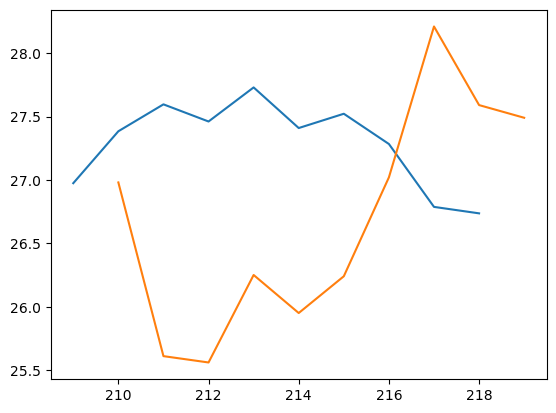

0.7218296389095088


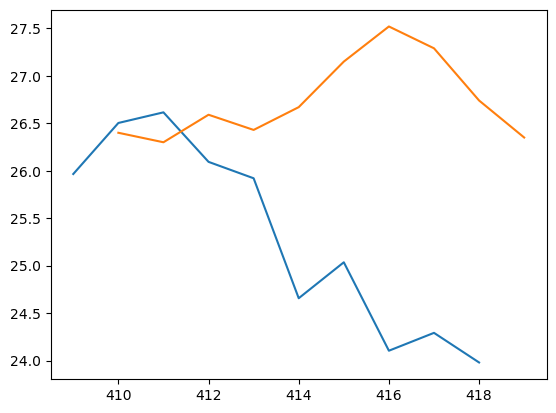

-1.5433614758099488


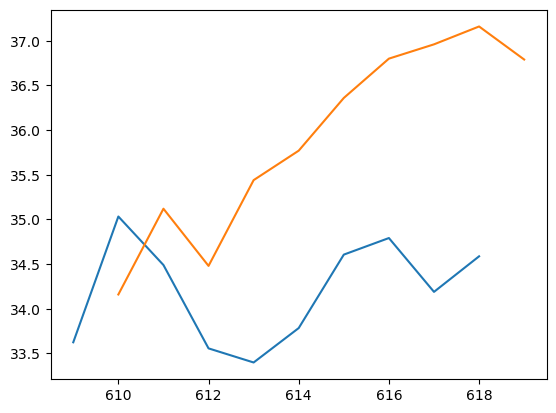

-1.534810160237183


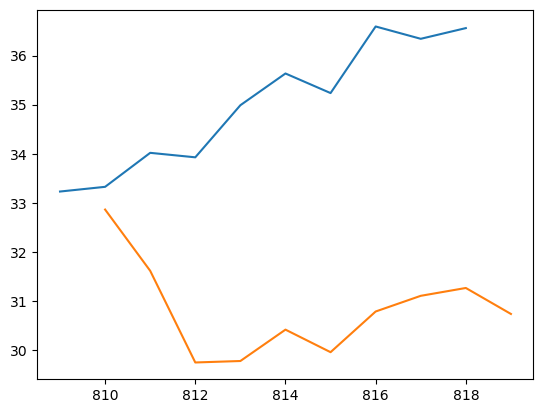

4.349917658293837


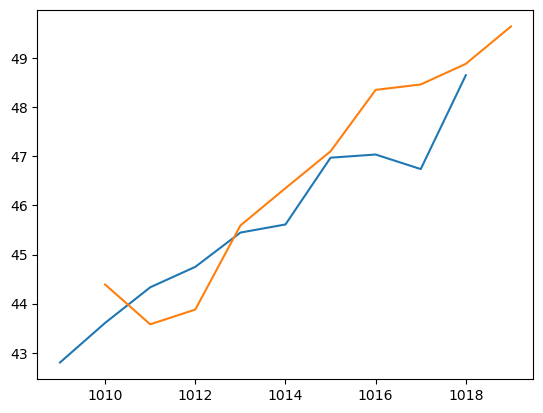

-0.3821970598118393


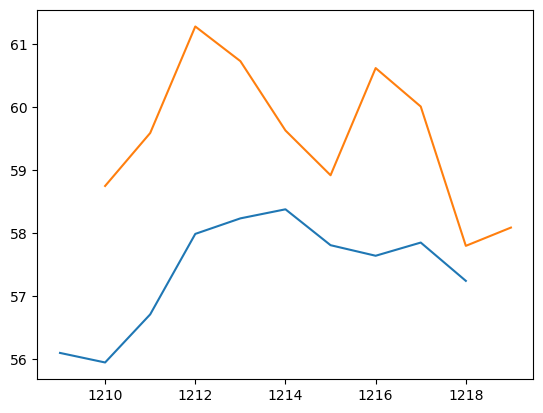

-2.1679300873330516


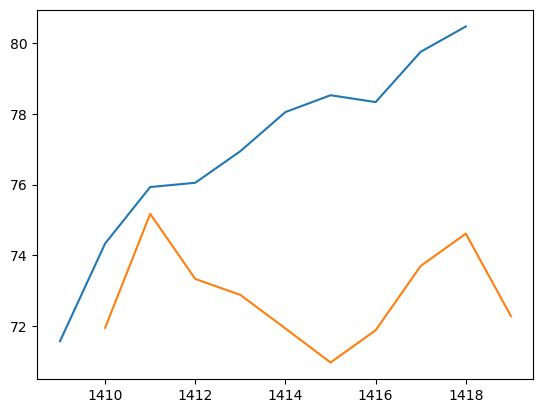

4.661425469437006


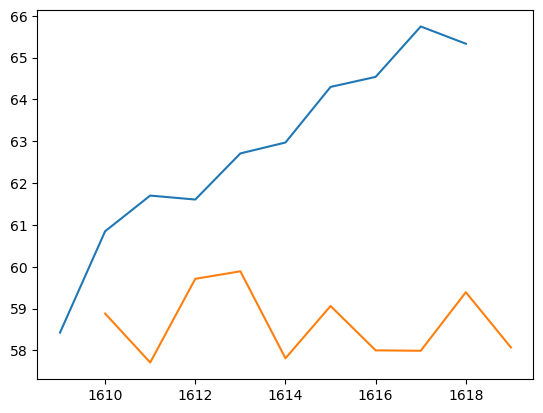

4.58919184592799


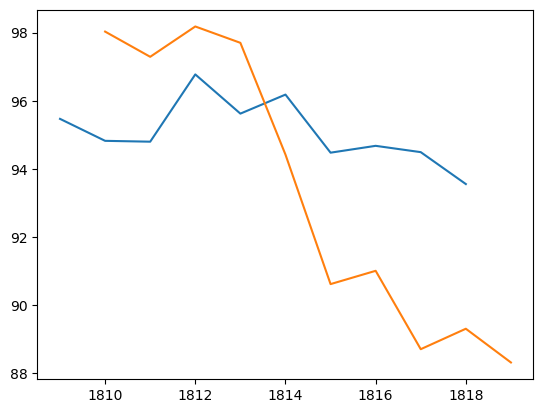

1.1258887350993265


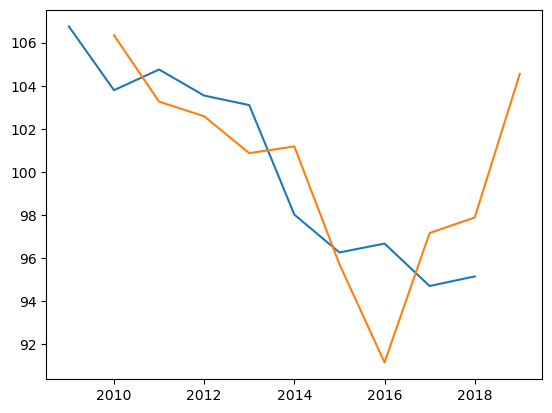

-0.01799048188733031


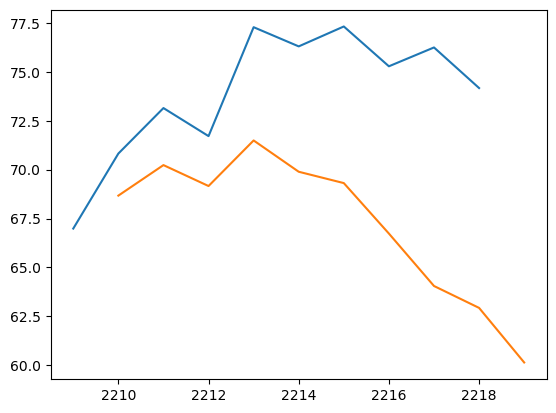

6.644929847698829


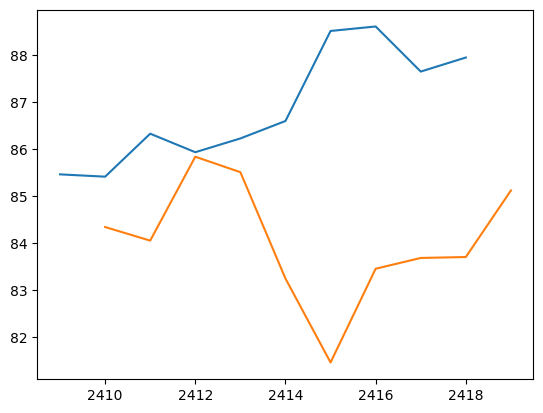

3.1122840917807744


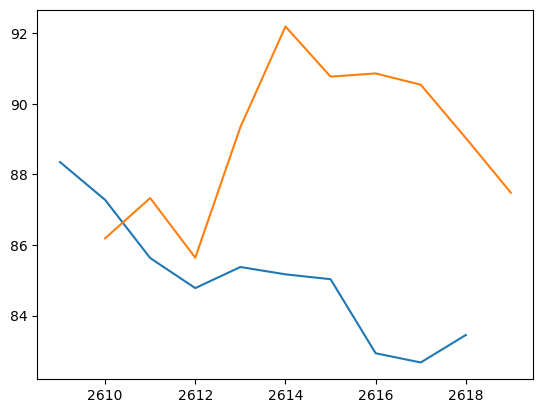

-4.396038941839748


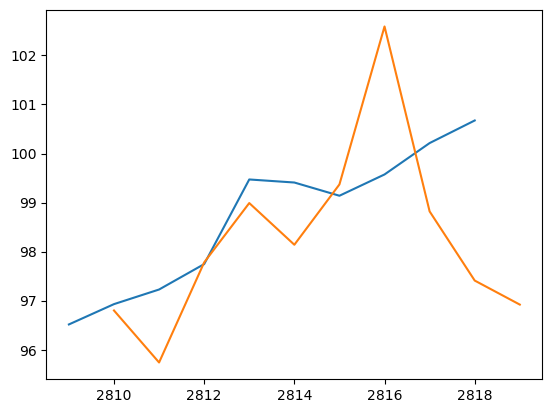

0.5268478141665204


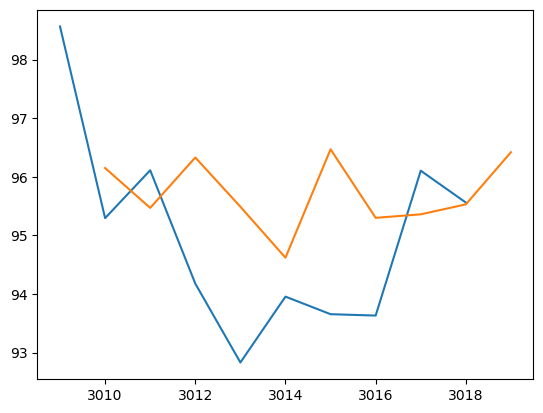

-1.0438985748278402


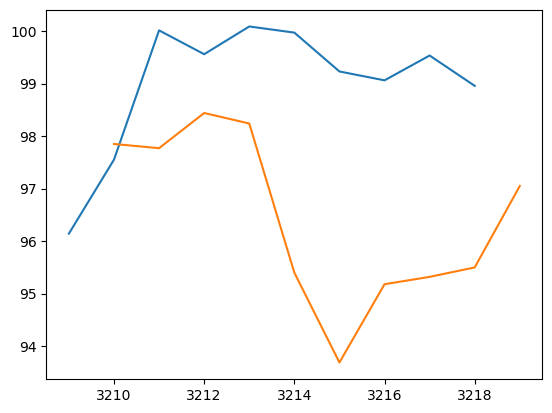

2.952893295713878


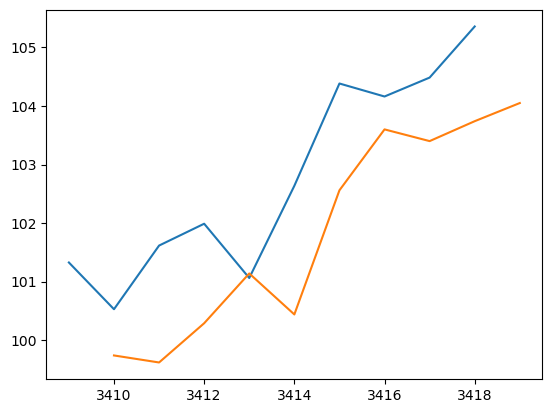

1.2989878548438298


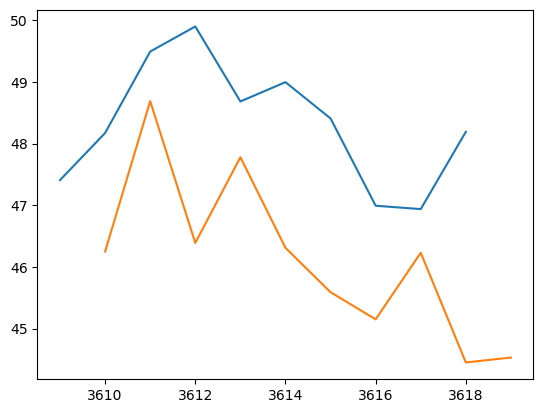

2.1048525496788457


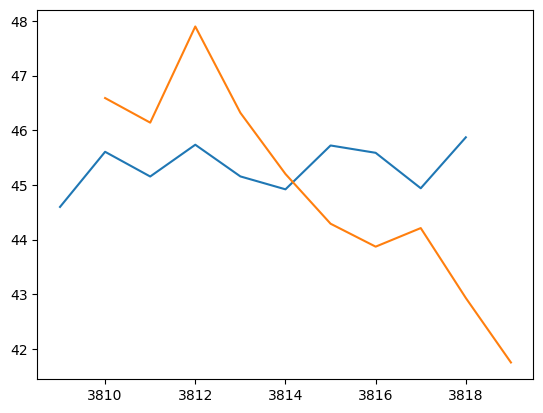

0.13784506058050205


In [131]:
data = pd.read_csv('cl=f.csv')['Adj Close']
data = data.fillna(method='ffill')
batches = batch_func(data, 200)
data = data.fillna(method='ffill')
fp = 10
total_resids = 0
for i in range(len(batches) - 1):
    residuals = 0
    batch = batches[i]
    forcaster, prediction = fit(batch, future_points=fp)
    plot(batches[i+1][0:fp], prediction)
    residuals = calc_stats(prediction, batches[i+1])
    print(residuals)
    total_resids += residuals

    

In [138]:
print(total_resids / (len(batches) - 1))

1.1126666884412582


In [134]:
total_resids

21.140667080383906